In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os  
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [2]:
def plot_dvfs_speedup(filename, app):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(filename)
    grouped = df.groupby(['CPU Cap (W)', 'GPU F (MHz)'])['Runtime (s)'].mean().reset_index()
    baseline_runtime = grouped.loc[grouped['GPU F (MHz)'].idxmax(), 'Runtime (s)']
    grouped['Normalized Speedup'] =  baseline_runtime / grouped['Runtime (s)'] 
    baseline_row = grouped[grouped['GPU F (MHz)'] == grouped['GPU F (MHz)'].max()]
    grouped_sorted = grouped.sort_values('GPU F (MHz)', ascending=False)
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_sorted['GPU F (MHz)'], grouped_sorted['Normalized Speedup'], marker='o', linestyle='-', color='blue')
    plt.gca().invert_xaxis()

    # Label the axes and the plot
    plt.xlabel('GPU Frequency (MHz)')
    plt.ylabel('Normalized Speedup')
    plt.title(f'DVFS Plot for {app}')
    plt.grid(True)
    plt.show()

def plot_dvfs_speedup_all(filenames, apps):
    plt.figure(figsize=(12, 6))
    
    # Markers and colors for different benchmarks
    markers = ['o', 's', 'D', '^', 'x', '+', '*', '<', '>', 'p', 'h']
    # colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']
    
    for filename, app, marker in zip(filenames, apps, markers):
        df = pd.read_csv(filename)
        grouped = df.groupby(['CPU Cap (W)', 'GPU F (MHz)'])['Runtime (s)'].mean().reset_index()
        baseline_runtime = grouped.loc[grouped['GPU F (MHz)'].idxmax(), 'Runtime (s)']
        grouped['Normalized Speedup'] = baseline_runtime / grouped['Runtime (s)'] 
        grouped_sorted = grouped.sort_values('GPU F (MHz)', ascending=False)
        plt.plot(grouped_sorted['GPU F (MHz)'], grouped_sorted['Normalized Speedup'], 
                 marker=marker, linestyle='-', label=app)
    
    plt.gca().invert_xaxis()
    plt.xlabel('GPU Frequency (MHz)')
    plt.ylabel('Normalized Speedup')
    plt.title('Speedup vs. Frequency Scaling')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_dvfs_energy_all(filenames, apps):
    plt.figure(figsize=(12, 6))

    # Markers and colors for different benchmarks
    markers = ['o', 's', 'D', '^', 'x', '+', '*', '<', '>', 'p', 'h']
    # colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']

    for filename, app, marker in zip(filenames, apps, markers):
        df = pd.read_csv(filename)

        # Drop rows where CPU_E or GPU_E is less than or equal to zero
        df = df[(df['CPU_E (J)'] > 0) & (df['GPU_E (J)'] > 0)]

        # Calculate the average energy consumption (CPU + GPU)
        df['Total Energy (J)'] = df['CPU_E (J)'] + df['GPU_E (J)']
        grouped = df.groupby(['CPU Cap (W)', 'GPU F (MHz)'])['Total Energy (J)'].mean().reset_index()

        # Normalize the energy consumption against the baseline (highest GPU frequency's energy)
        baseline_energy = grouped.loc[grouped['GPU F (MHz)'].idxmax(), 'Total Energy (J)']
        grouped['Normalized Energy'] = grouped['Total Energy (J)'] / baseline_energy

        grouped_sorted = grouped.sort_values('GPU F (MHz)', ascending=False)

        # Plot the normalized energy for each benchmark
        plt.plot(grouped_sorted['GPU F (MHz)'], grouped_sorted['Normalized Energy'], 
                 marker=marker, linestyle='-', label=app)

    plt.gca().invert_xaxis()
    plt.xlabel('GPU Frequency (MHz)')
    plt.ylabel('Normalized Energy Consumption')
    plt.title('Energy Consumption vs. Frequency Scaling')
    plt.legend()
    plt.grid(True)
    plt.show()



In [3]:
data_dir = "./altis_fs_res/"
# altis_benchmarks_0
busspeeddownload = data_dir + "busspeeddownload_cap_dual.csv"
busspeedreadback = data_dir + "busspeedreadback_cap_dual.csv"
maxflops = data_dir + "maxflops_cap_dual.csv"

# altis_benchmarks_1
bfs = data_dir + "bfs_cap_dual.csv"
gemm = data_dir + "gemm_cap_dual.csv"
gups = data_dir + "gups_cap_dual.csv"
pathfinder = data_dir + "pathfinder_cap_dual.csv"
sort = data_dir + "sort_cap_dual.csv"

# altis_benchmarks_2
cfd = data_dir + "cfd_cap_dual.csv"
cfd_double = data_dir + "cfd_double_cap_dual.csv"
fdtd2d = data_dir + "fdtd2d_cap_dual.csv"
kmeans = data_dir + "kmeans_cap_dual.csv"
lavamd = data_dir + "lavamd_cap_dual.csv"
nw = data_dir + "nw_cap_dual.csv"
particlefilter_float = data_dir + "particlefilter_float_cap_dual.csv"
particlefilter_naive = data_dir + "particlefilter_naive_cap_dual.csv"
raytracing = data_dir + "raytracing_cap_dual.csv"
srad = data_dir + "srad_cap_dual.csv"
where = data_dir + "where_cap_dual.csv"

# ECP benchmark
# CRADL = ecp_data_dir + "CRADL_cap_dual.csv"
# Laghos = ecp_data_dir + "Laghos_cap_dual.csv"
# miniGAN = ecp_data_dir + "miniGAN_cap_dual.csv"
# sw4lite = ecp_data_dir + "sw4lite_cap_dual.csv"
# XSBench = ecp_data_dir + "XSBench_cap_dual.csv"

benchmarks = [cfd_double, kmeans, lavamd, particlefilter_naive, raytracing, gemm, fdtd2d, pathfinder, sort]

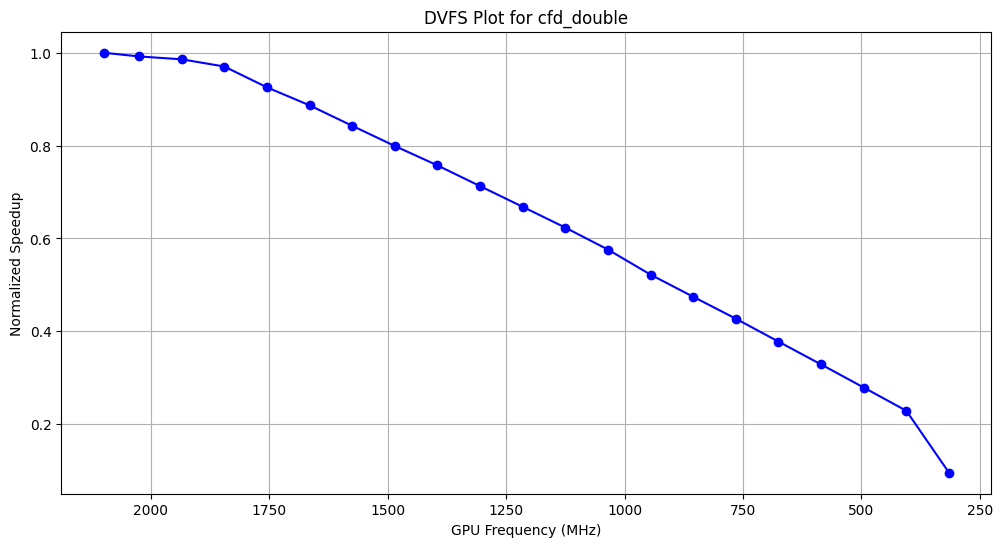

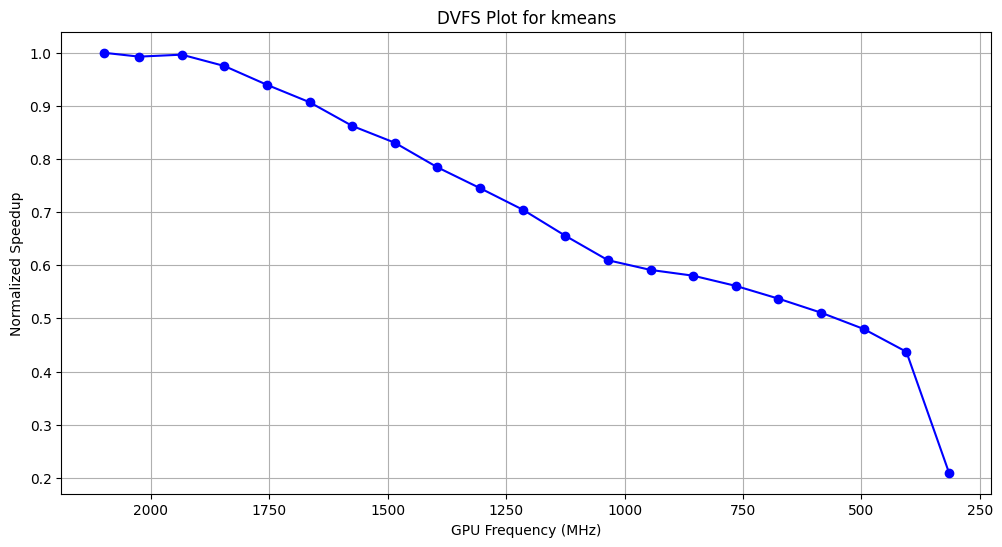

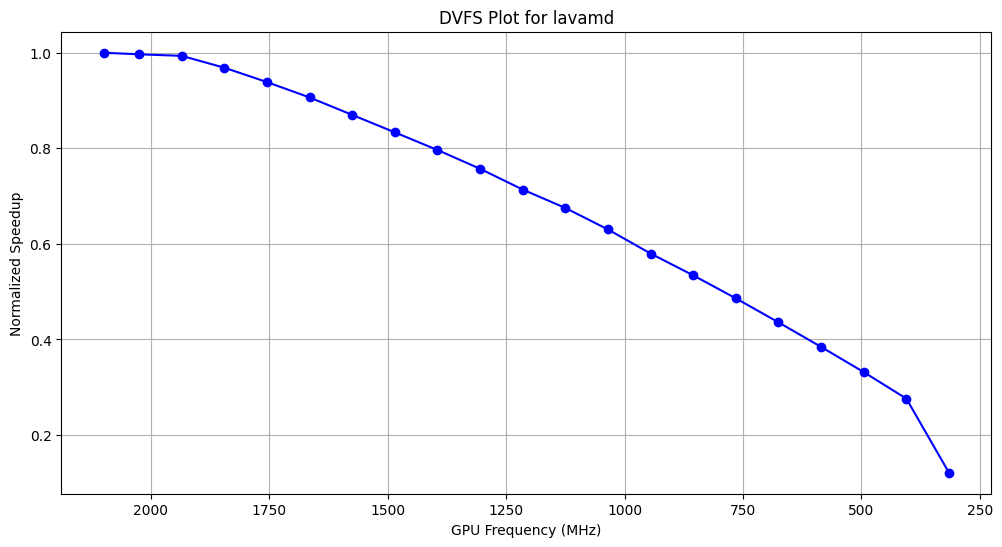

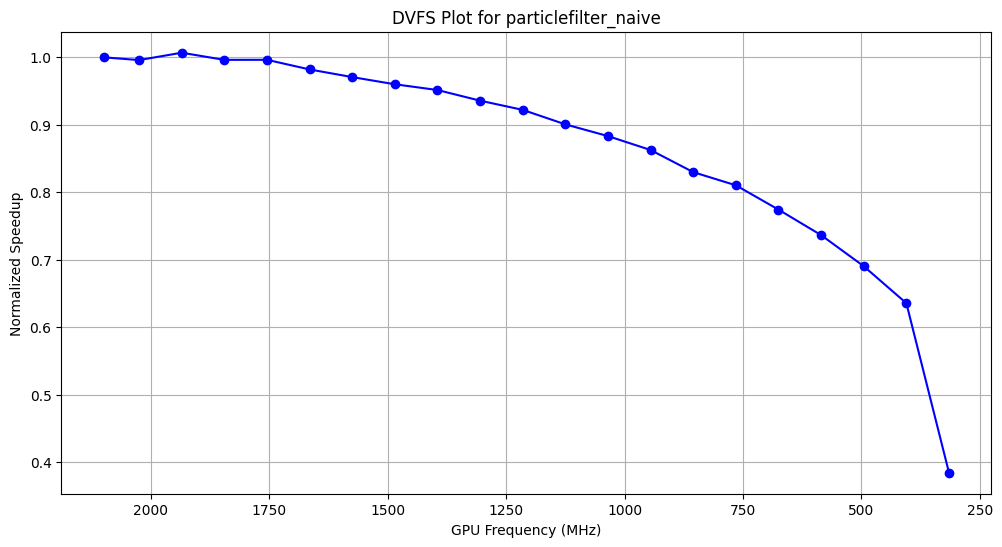

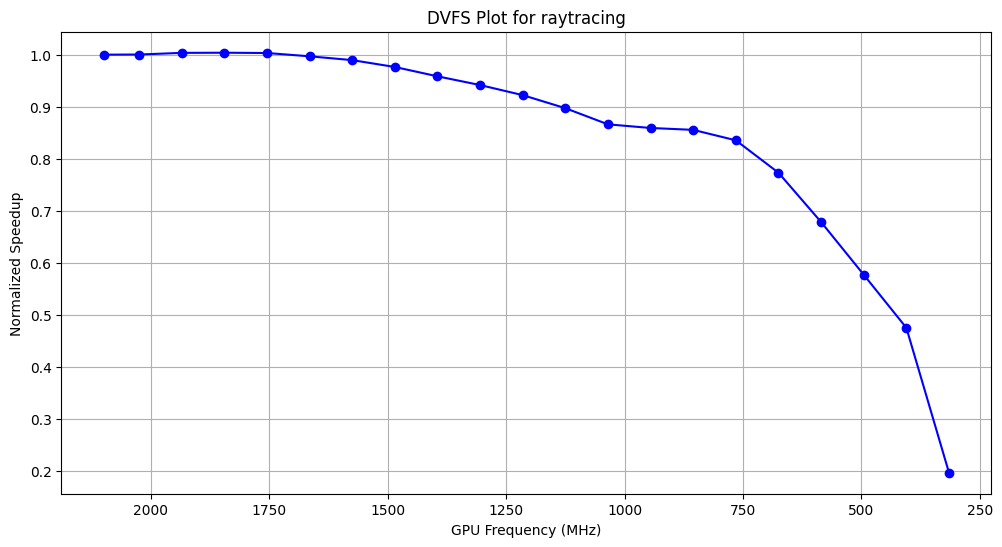

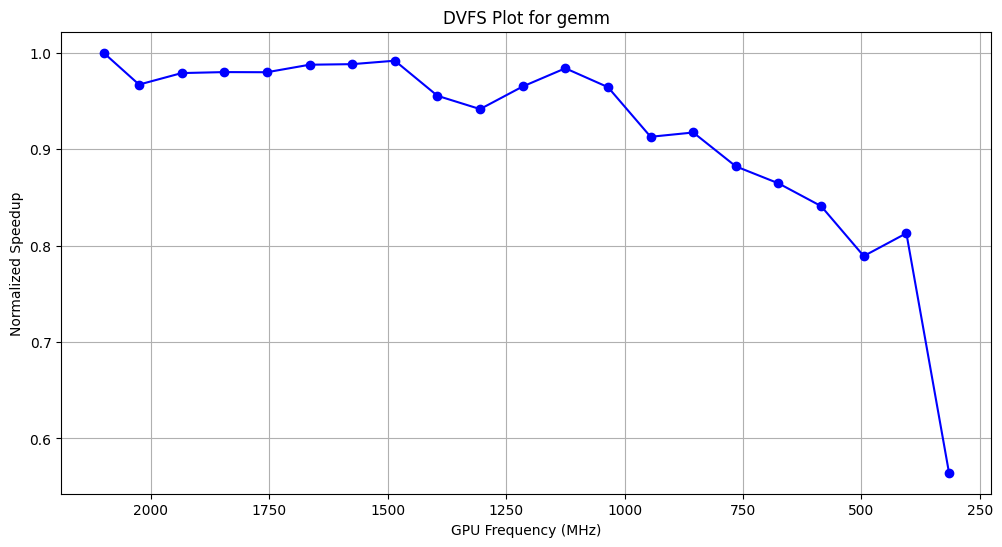

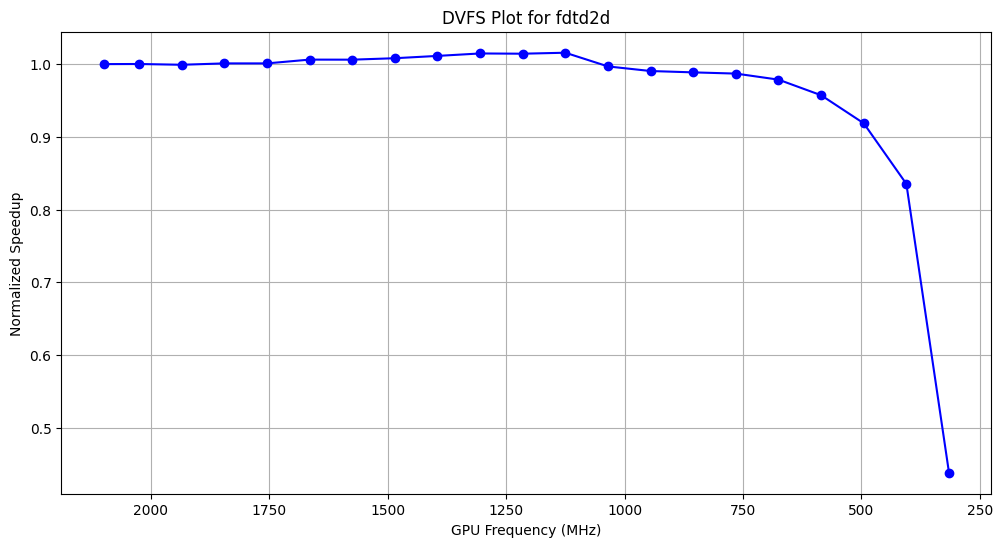

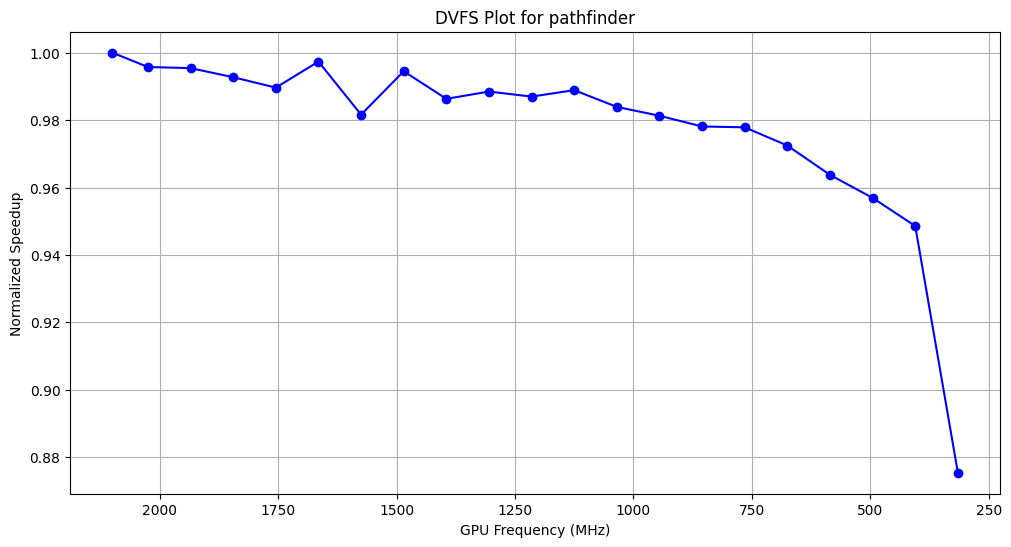

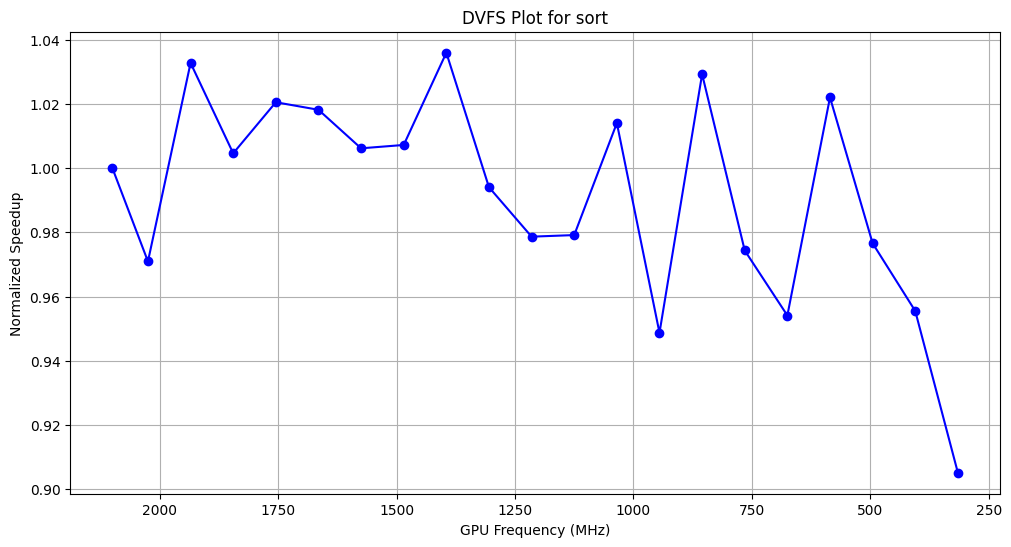

In [15]:
for benchmark in benchmarks:
    # Extract the benchmark name from the file path
    benchmark_name = os.path.basename(benchmark).split("_cap_dual.csv")[0]
    plot_dvfs_speedup(benchmark, benchmark_name)

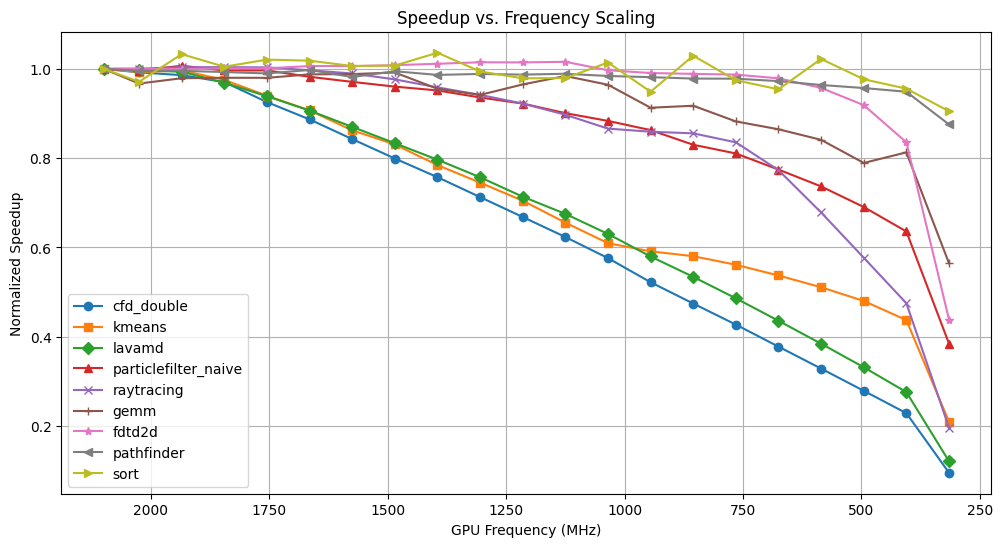

In [44]:
benchmark_names = [os.path.basename(b).split('_cap_dual.csv')[0] for b in benchmarks]
plot_dvfs_speedup_all(benchmarks, benchmark_names)

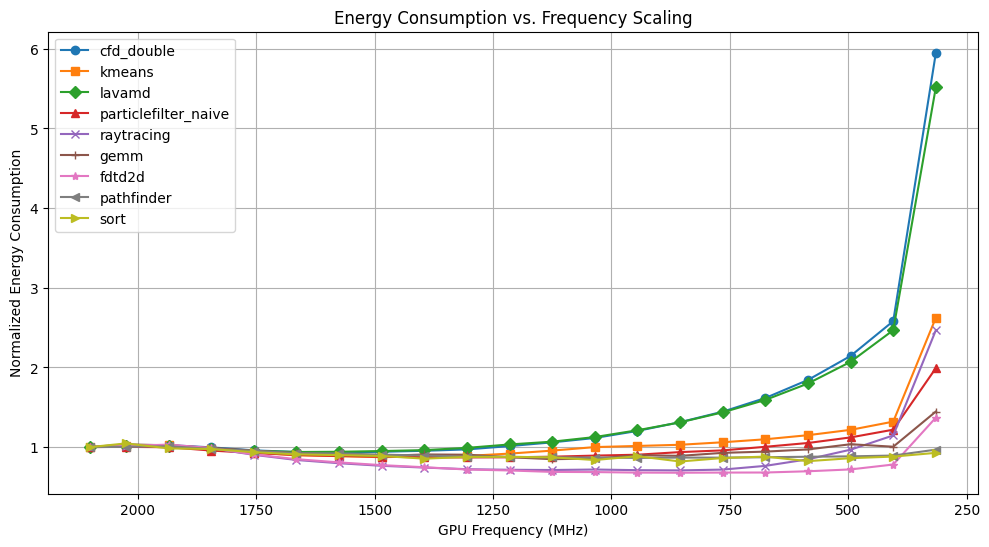

In [45]:
plot_dvfs_energy_all(benchmarks, benchmark_names)